# **数据分析**

# **Data Preparation**

**在本节中，我清理并预处理数据集，以确保其适合分析。这包括填充缺失值、处理分类变量以及筛选相关的年龄组（Z世代和千禧一代）**

**Load and inspect data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import statsmodels.api as sm

# Ensure plots are displayed inline
%matplotlib inline
# Load the cleaned data Excel file
data = pd.read_excel('cleaned data -sustainable fashion.xlsx')

# Display the first few rows of the dataset
data.head()


,Knowledge on Sustainable Fashion,Environmental Awareness,Importance of Sustainability,Sustainability Factors: Use of eco-friendly materials,Sustainability Factors: Ethical production and labor practices,Sustainability Factors: Reduction of carbon footprint,Sustainability Factors: Minimal water usage,Sustainability Factors: Transparency in the supply chain,Sustainability Factors: Supporting local and artisanal brands,Sustainable Material preference,...,Features_Sustainability_certifications,Features_Sustainable_practices,Features_User_reviews,Features_User-generated_content,Age_mid,Probability_of_being_knowledgable,Knowledgeable_not_interested,Interested_not_knowledgeable,Probability_of_being_interested,Probability_of_using_app
0,4,3,6,5,5,5,5,5,5,7.0,...,1,0,0,1,59.5,0,0,1,1,0
1,4,5,6,7,7,7,7,7,7,6.0,...,0,0,0,0,29.5,0,0,1,1,0
2,4,3,7,6,6,6,6,6,6,NaN,...,0,0,0,0,29.5,0,0,1,1,0
3,6,5,5,5,5,6,6,5,6,5.0,...,0,0,0,1,49.5,1,0,0,1,0
4,6,6,5,5,5,5,5,5,5,5.0,...,1,0,0,0,59.5,1,0,0,1,0


**Data exploration and cleaning**

In [2]:
# Check for missing values
data.isnull().sum()

# Display basic statistics
data.describe()

,Knowledge on Sustainable Fashion,Environmental Awareness,Importance of Sustainability,Sustainability Factors: Use of eco-friendly materials,Sustainability Factors: Ethical production and labor practices,Sustainability Factors: Reduction of carbon footprint,Sustainability Factors: Minimal water usage,Sustainability Factors: Transparency in the supply chain,Sustainability Factors: Supporting local and artisanal brands,Sustainable Material preference,...,Features_Sustainability_certifications,Features_Sustainable_practices,Features_User_reviews,Features_User-generated_content,Age_mid,Probability_of_being_knowledgable,Knowledgeable_not_interested,Interested_not_knowledgeable,Probability_of_being_interested,Probability_of_using_app
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9345.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.072800,4.928100,5.197100,5.415700,5.240100,5.171000,5.203300,5.40000,5.336200,5.065918,...,0.151700,0.017300,0.365300,0.290800,37.404300,0.706300,0.144500,0.249200,0.811000,0.259900
std,1.366487,1.043283,1.074787,0.840931,0.901073,0.994715,0.972452,0.90823,0.913922,1.139339,...,0.358748,0.130393,0.481538,0.454154,14.553408,0.455479,0.351614,0.432571,0.391528,0.438601
min,2.000000,3.000000,3.000000,4.000000,3.000000,2.000000,2.000000,4.00000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,39.500000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,...,0.000000,0.000000,1.000000,1.000000,49.500000,1.000000,0.000000,0.000000,1.000000,1.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,59.500000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Descriptive Statistics**

**Exploratory Data Analysis (EDA)**

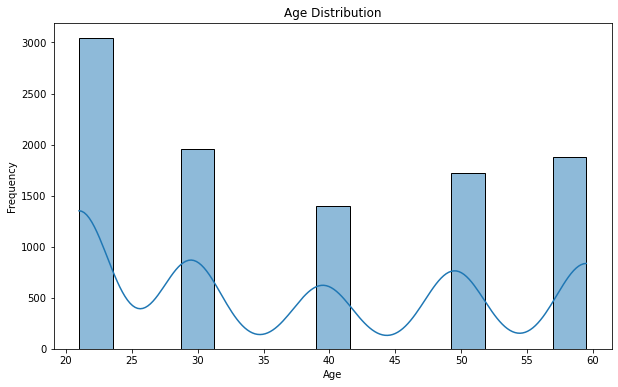

In [3]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age_mid'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

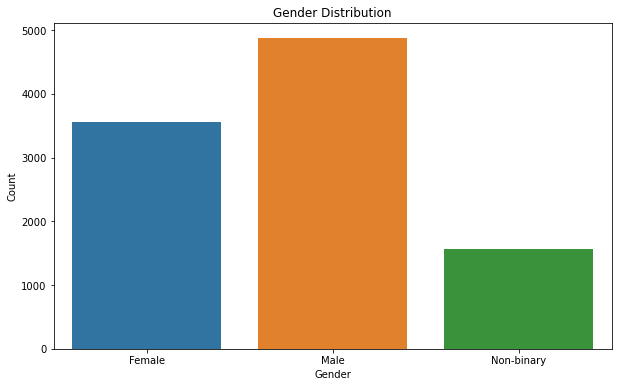

In [4]:
# Gender distribution
plt.figure(figsize=(10, 6))
gender_data = data[['Gender_F', 'Gender_M', 'Gender_NB']].sum().reset_index()
gender_data.columns = ['Gender', 'Count']
gender_data['Gender'] = gender_data['Gender'].replace({'Gender_F': 'Female', 'Gender_M': 'Male', 'Gender_NB': 'Non-binary'})
sns.barplot(x='Gender', y='Count', data=gender_data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

_In this part of the analysis, we aim to explore the relationship between consumers' environmental awareness and how important they consider sustainability when making fashion-related decisions. This can provide insights into whether higher environmental awareness correlates with a greater emphasis on sustainability._

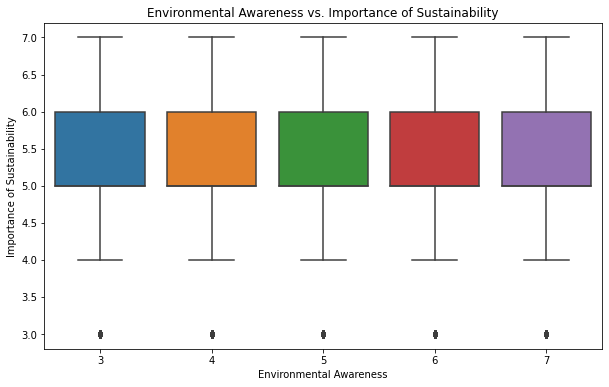

In [5]:
# Environmental Awareness vs. Importance of Sustainability
plt.figure(figsize=(10, 6))
sns.boxplot(x='Environmental Awareness', y='Importance of Sustainability', data=data)
plt.title('Environmental Awareness vs. Importance of Sustainability')
plt.xlabel('Environmental Awareness')
plt.ylabel('Importance of Sustainability')
plt.show()

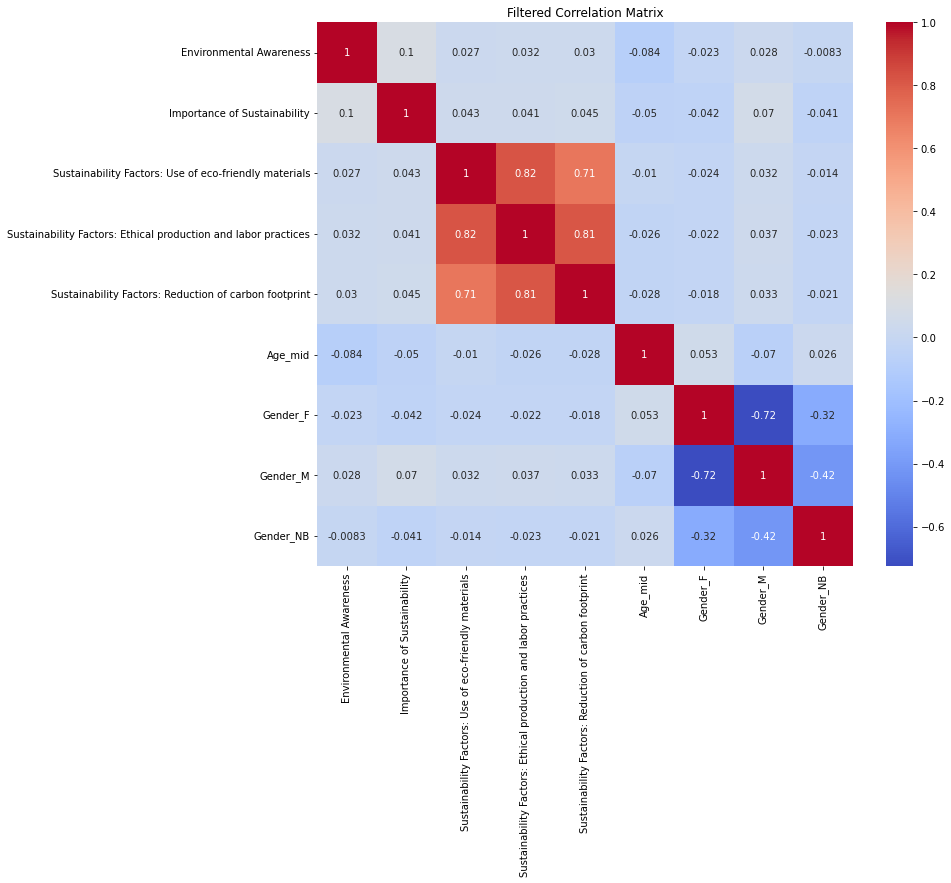

In [6]:
# Select a subset of relevant variables
subset = data[['Environmental Awareness', 'Importance of Sustainability', 
               'Sustainability Factors: Use of eco-friendly materials', 
               'Sustainability Factors: Ethical production and labor practices', 
               'Sustainability Factors: Reduction of carbon footprint', 
               'Age_mid', 'Gender_F', 'Gender_M', 'Gender_NB']]

# Compute the correlation matrix for the subset
subset_corr_matrix = subset.corr()

# Plot the filtered correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Filtered Correlation Matrix')
plt.show()


In [7]:
# Compute the correlation matrix for the subset
subset_corr_matrix = subset.corr()

# Display the correlation matrix
print(subset_corr_matrix)

                                                    Environmental Awareness  \
Environmental Awareness                                            1.000000   
Importance of Sustainability                                       0.099957   
Sustainability Factors: Use of eco-friendly mat...                 0.027004   
Sustainability Factors: Ethical production and ...                 0.032302   
Sustainability Factors: Reduction of carbon foo...                 0.030448   
Age_mid                                                           -0.084363   
Gender_F                                                          -0.023061   
Gender_M                                                           0.028097   
Gender_NB                                                         -0.008262   

                                                    Importance of Sustainability  \
Environmental Awareness                                                 0.099957   
Importance of Sustainability             

In [8]:
# Define age ranges for Gen Z and Millennials
gen_z_age_range = (10, 25)
millennial_age_range = (26, 40)

# Filter the dataset to include only Gen Z and Millennials
data_filtered = data[(data['Age_mid'] >= gen_z_age_range[0]) & (data['Age_mid'] <= millennial_age_range[1])].copy()

# Create a new column to categorize the age groups using .loc
data_filtered.loc[:, 'Age_Group'] = pd.cut(data_filtered['Age_mid'], bins=[0, gen_z_age_range[1], millennial_age_range[1]], labels=['Gen Z', 'Millennials'])


In [9]:
import numpy as np

# Create a new column to categorize the age groups using .loc
data_filtered.loc[:, 'Age_Group'] = pd.cut(data_filtered['Age_mid'], bins=[0, gen_z_age_range[1], millennial_age_range[1]], labels=['Gen Z', 'Millennials'])

# Fill missing values with the mean of numeric columns only
numeric_cols = data_filtered.select_dtypes(include=['float64', 'int64']).columns
data_filtered[numeric_cols] = data_filtered[numeric_cols].fillna(data_filtered[numeric_cols].mean())

# Check for infinite values and replace them
data_filtered.replace([np.inf, -np.inf], np.nan, inplace=True)
data_filtered.dropna(inplace=True)


In [11]:
# Display the first few rows of the updated dataset to verify
print(data_filtered.head())


   Knowledge on Sustainable Fashion  Environmental Awareness  \
1                                 4                        5   
2                                 4                        3   
5                                 4                        6   
6                                 7                        3   
7                                 5                        6   

   Importance of Sustainability  \
1                             6   
2                             7   
5                             7   
6                             4   
7                             6   

   Sustainability Factors: Use of eco-friendly materials  \
1                                                  7       
2                                                  6       
5                                                  5       
6                                                  5       
7                                                  7       

   Sustainability Factors: Ethical producti

# **Regression Analysis**

**在本节中，我们使用OLS回归分析来研究可持续性重要性与各种因素之间的关系。分析确定了环境意识和可持续材料偏好等重要预测因素。**

In [12]:
import statsmodels.api as sm

# Define the dependent and independent variables after handling missing values
X = data_filtered[['Environmental Awareness', 'Sustainability Factors: Use of eco-friendly materials', 
                   'Sustainability Factors: Ethical production and labor practices', 
                   'Sustainability Factors: Reduction of carbon footprint', 
                   'Sustainability Factors: Minimal water usage', 
                   'Sustainability Factors: Transparency in the supply chain', 
                   'Sustainability Factors: Supporting local and artisanal brands', 
                   'Sustainable Material preference', 
                   'Probability_of_being_knowledgable', 
                   'Probability_of_being_interested', 
                   'Probability_of_using_app', 
                   'Age_Group']]

# Convert categorical variable Age_Group into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

y = data_filtered['Importance of Sustainability']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression analysis
print(model.summary())


                                 OLS Regression Results                                 
Dep. Variable:     Importance of Sustainability   R-squared:                       0.582
Model:                                      OLS   Adj. R-squared:                  0.581
Method:                           Least Squares   F-statistic:                     741.4
Date:                          Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                                  15:28:21   Log-Likelihood:                -6850.6
No. Observations:                          6397   AIC:                         1.373e+04
Df Residuals:                              6384   BIC:                         1.382e+04
Df Model:                                    12                                         
Covariance Type:                      nonrobust                                         
                                                                     coef    std err          t      P>|t|    

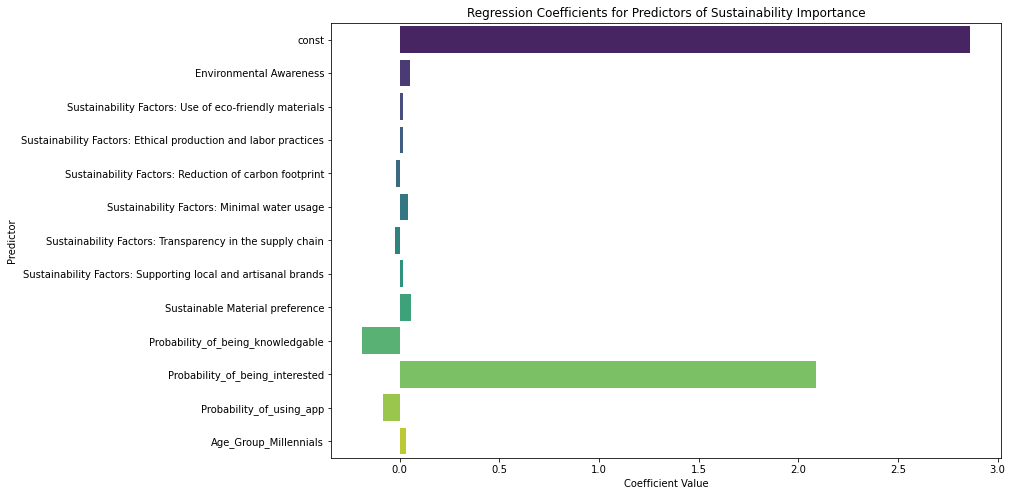

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=model.params.values, y=model.params.index, palette='viridis')
plt.title('Regression Coefficients for Predictors of Sustainability Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.show()

# **Cluster Analysis**

**本节的目标是使用K均值聚类将数据集根据消费者的可持续性偏好和行为分成不同的群体。这有助于识别出三个具有不同参与程度的群体。**

In [14]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = data_filtered[['Environmental Awareness', 'Importance of Sustainability', 
                          'Sustainability Factors: Use of eco-friendly materials', 
                          'Sustainability Factors: Ethical production and labor practices', 
                          'Sustainability Factors: Reduction of carbon footprint', 
                          'Knowledge on Sustainable Fashion', 
                          'Features_Sustainability_certifications', 
                          'Features_Sustainable_practices', 
                          'Features_User_reviews', 
                          'Features_User-generated_content', 
                          'Age_Group']]

# Convert categorical variable Age_Group into dummy/indicator variables
features = pd.get_dummies(features, drop_first=True)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


**K-means clustering**

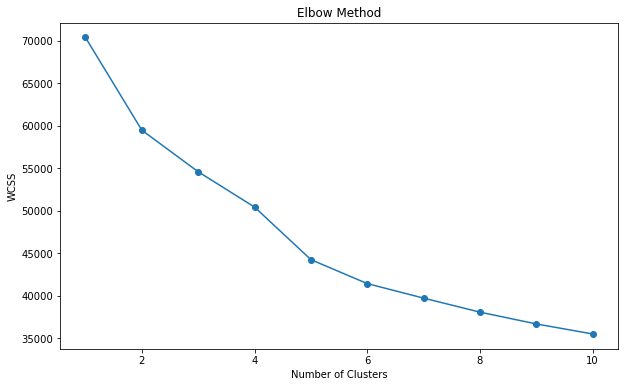

In [15]:
from sklearn.cluster import KMeans

# Determine the number of clusters (using the elbow method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply k-means to the dataset (choosing an optimal number of clusters, e.g., 3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster labels to the dataset
data_filtered['Cluster'] = clusters


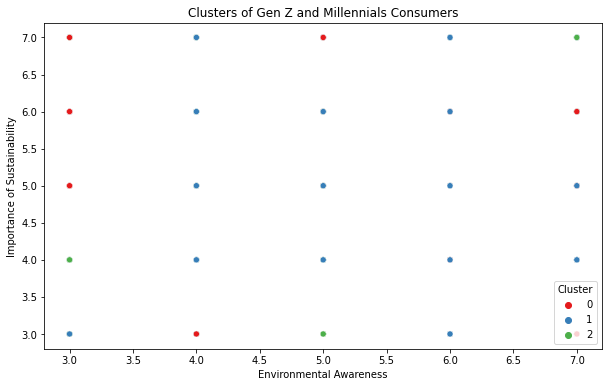

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Environmental Awareness', y='Importance of Sustainability', hue='Cluster', data=data_filtered, palette='Set1')
plt.title('Clusters of Gen Z and Millennials Consumers')
plt.xlabel('Environmental Awareness')
plt.ylabel('Importance of Sustainability')
plt.show()


         Knowledge on Sustainable Fashion  Environmental Awareness  \
Cluster                                                              
0                                5.048682                 4.978364   
1                                5.026263                 5.035416   
2                                5.120166                 4.940125   

         Importance of Sustainability  \
Cluster                                 
0                            5.173090   
1                            5.345404   
2                            5.171726   

         Sustainability Factors: Use of eco-friendly materials  \
Cluster                                                          
0                                                 5.657201       
1                                                 6.035416       
2                                                 4.633680       

         Sustainability Factors: Ethical production and labor practices  \
Cluster                              

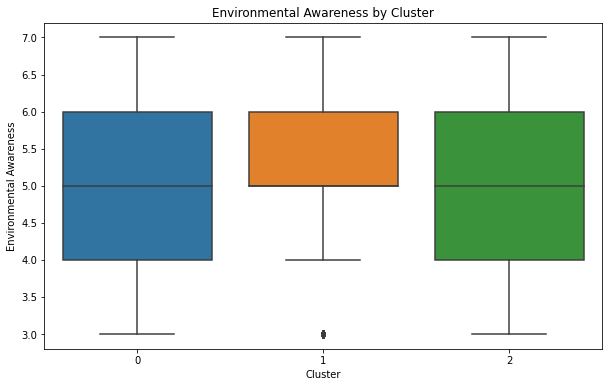

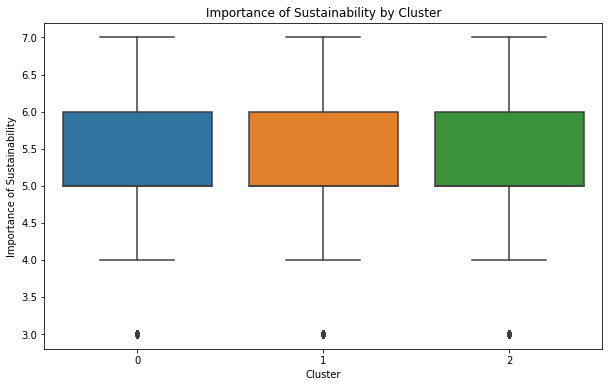

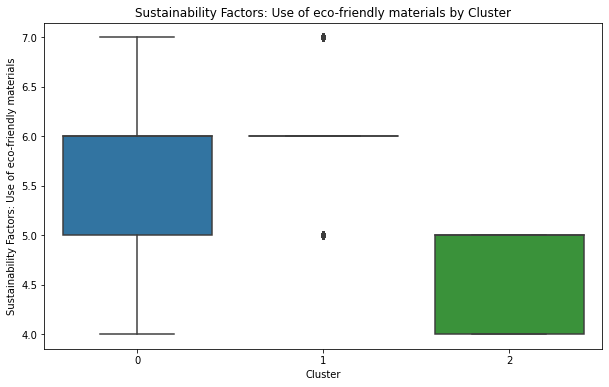

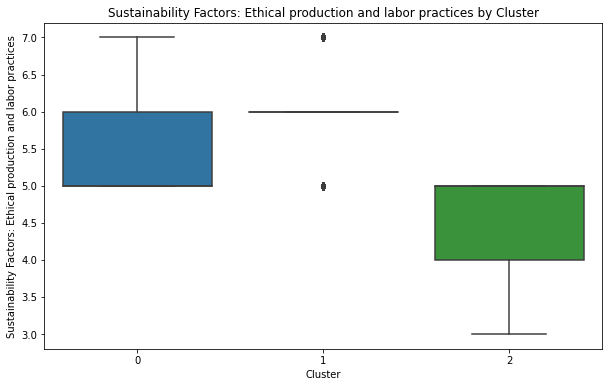

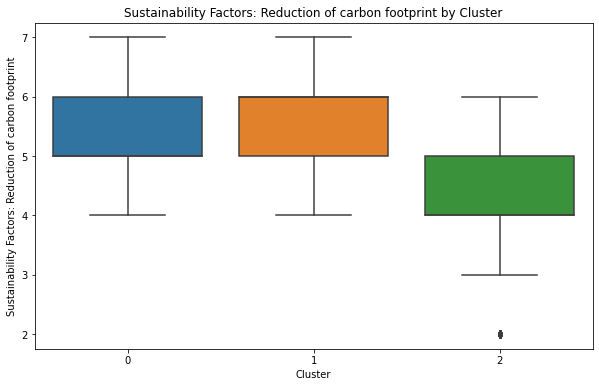

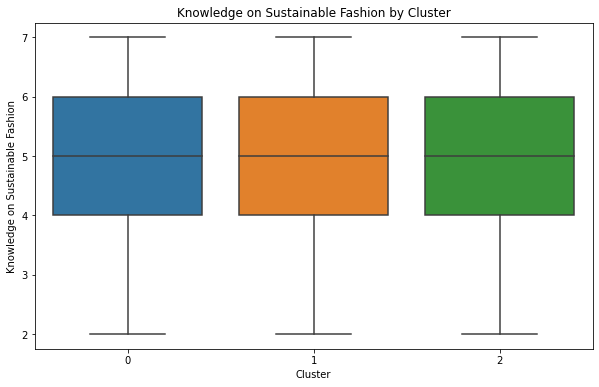

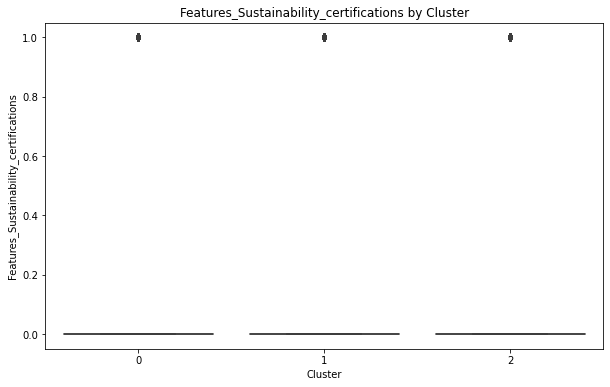

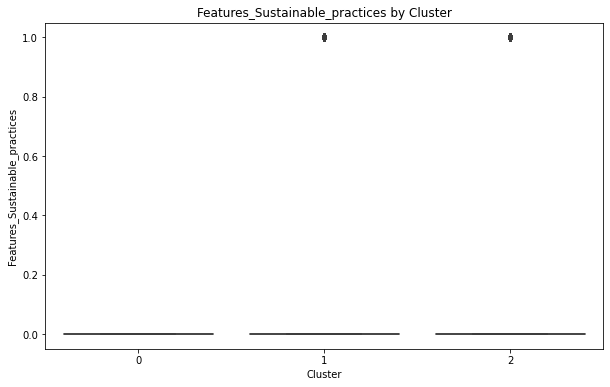

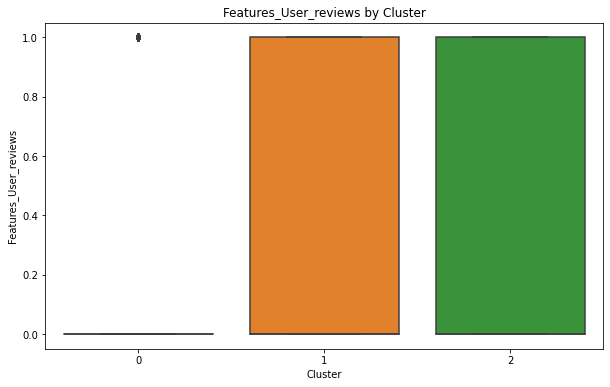

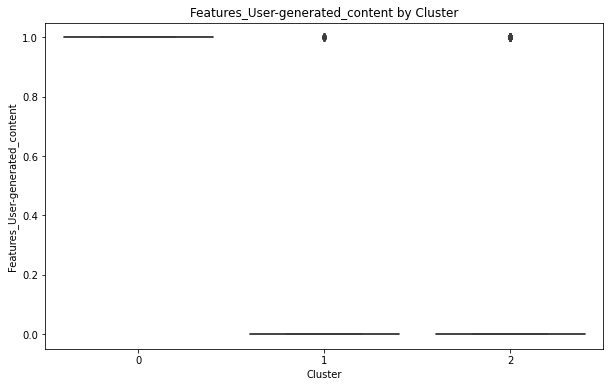

ValueError: Could not interpret input 'Age_Group_Millennials'

<Figure size 720x432 with 0 Axes>

In [17]:
# Describe the characteristics of each cluster
cluster_summary = data_filtered.groupby('Cluster').mean()
print(cluster_summary)

# Visualize the distribution of clusters across different features
for feature in features.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=data_filtered)
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()


# **Feature Importance Analysis**

**在本节中，我们使用随机森林模型确定预测可持续性重要性最具影响力的因素。分析突出了主要特征，如兴趣概率和可持续材料偏好**

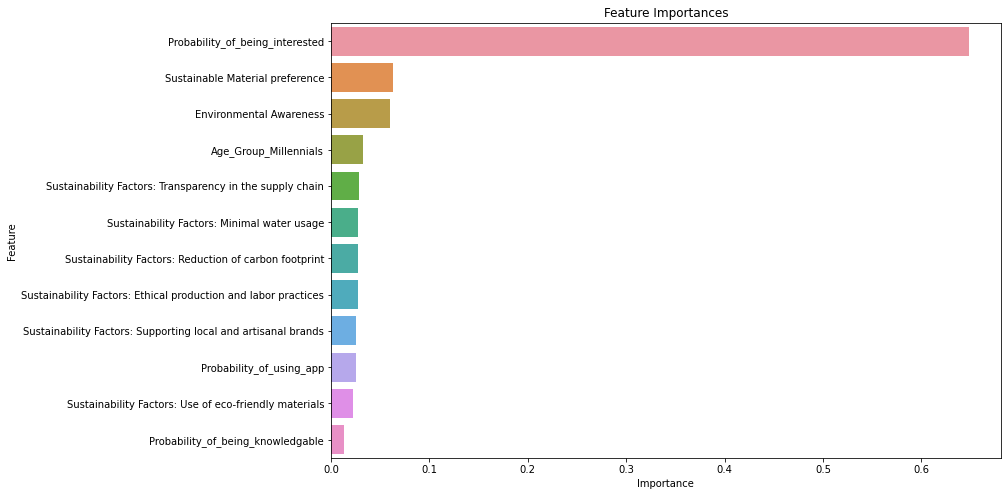

In [18]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_filtered is already prepared and cleaned
# Define the dependent and independent variables
X = data_filtered[['Environmental Awareness', 'Sustainability Factors: Use of eco-friendly materials', 
                   'Sustainability Factors: Ethical production and labor practices', 
                   'Sustainability Factors: Reduction of carbon footprint', 
                   'Sustainability Factors: Minimal water usage', 
                   'Sustainability Factors: Transparency in the supply chain', 
                   'Sustainability Factors: Supporting local and artisanal brands', 
                   'Sustainable Material preference', 
                   'Probability_of_being_knowledgable', 
                   'Probability_of_being_interested', 
                   'Probability_of_using_app', 
                   'Age_Group']]

# Convert categorical variable Age_Group into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

y = data_filtered['Importance of Sustainability']

# Fit a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort and plot feature importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


In [19]:
# Display the feature importance DataFrame
print(feature_importance_df)


                                              Feature  Importance
9                     Probability_of_being_interested    0.648114
7                     Sustainable Material preference    0.062969
0                             Environmental Awareness    0.059635
11                              Age_Group_Millennials    0.032284
5   Sustainability Factors: Transparency in the su...    0.028395
4         Sustainability Factors: Minimal water usage    0.027825
3   Sustainability Factors: Reduction of carbon fo...    0.027375
2   Sustainability Factors: Ethical production and...    0.027332
6   Sustainability Factors: Supporting local and a...    0.025484
10                           Probability_of_using_app    0.025308
1   Sustainability Factors: Use of eco-friendly ma...    0.022500
8                   Probability_of_being_knowledgable    0.012779


**分析提供了Z世代和千禧一代消费者中可持续性重要性的关键驱动因素的见解。提高对可持续性的兴趣、推广可持续材料和增加环境意识是关键策略**

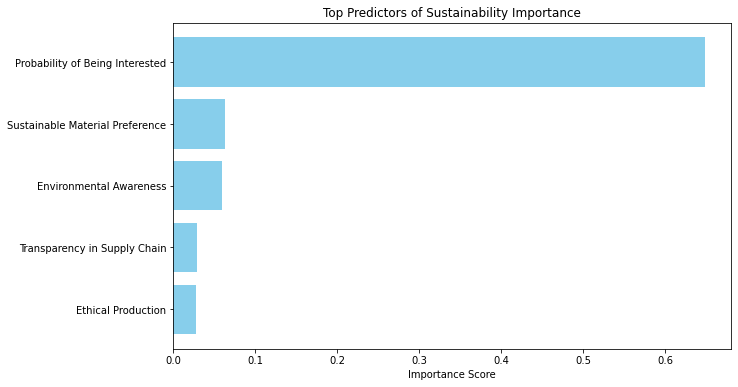

In [20]:
import matplotlib.pyplot as plt

# Data for the bar chart
predictors = ['Probability of Being Interested', 'Sustainable Material Preference', 'Environmental Awareness', 'Transparency in Supply Chain', 'Ethical Production']
importance_scores = [0.648114, 0.062969, 0.059635, 0.028395, 0.027332]

plt.figure(figsize=(10, 6))
plt.barh(predictors, importance_scores, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top Predictors of Sustainability Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest score on top
plt.show()

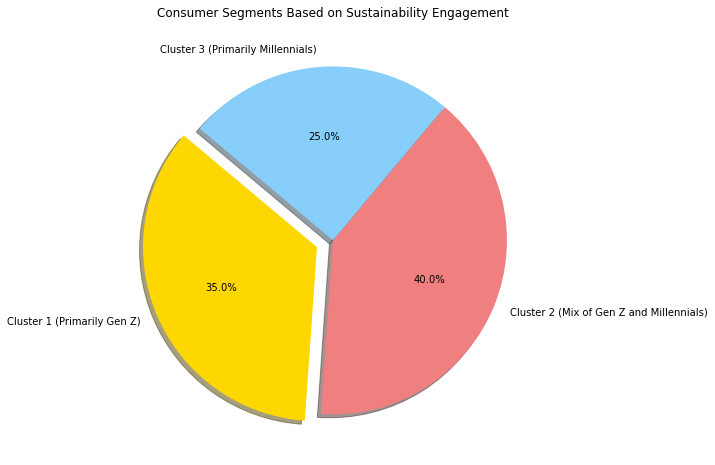

In [21]:
# Data for the pie chart
segments = ['Cluster 1 (Primarily Gen Z)', 'Cluster 2 (Mix of Gen Z and Millennials)', 'Cluster 3 (Primarily Millennials)']
sizes = [35, 40, 25]  # Example percentages for each cluster
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)  # Explode the first slice for emphasis

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=segments, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Consumer Segments Based on Sustainability Engagement')
plt.show()


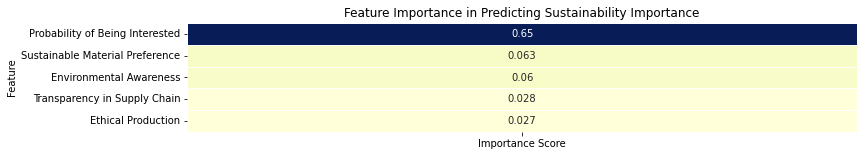

In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data for the heatmap
data = {
    'Feature': ['Probability of Being Interested', 'Sustainable Material Preference', 'Environmental Awareness', 'Transparency in Supply Chain', 'Ethical Production'],
    'Importance Score': [0.648114, 0.062969, 0.059635, 0.028395, 0.027332]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 2))  # Adjust the figure size to be wider and shorter
sns.heatmap(df.set_index('Feature'), annot=True, cmap='YlGnBu', cbar=False, linewidths=.5)
plt.title('Feature Importance in Predicting Sustainability Importance')
plt.show()
